In [16]:
import numpy as np
import os

file_list_path = "/data/home/antoni/datasets/filelist_audio_all.txt"

with open(file_list_path, "r") as file:
    audio_files = file.read().splitlines()

for audio_file in audio_files:
    audio_file = audio_file.replace("audio", "audio_emb").replace(".wav", ".npy")

    # Initialize a list to store embeddings from all folders
    all_embeddings = [np.load(audio_file)]

    # Process embeddings from audio_emb and audio_emb_0 to audio_emb_23
    embedding_sources = ["base"]  # Start with the base embedding
    for i in range(24):
        emb_path = audio_file.replace("audio_emb", f"audio_emb_{i}")
        if os.path.exists(emb_path):
            all_embeddings.append(np.load(emb_path))
            embedding_sources.append(f"emb_{i}")

    break

(3032, 25600)


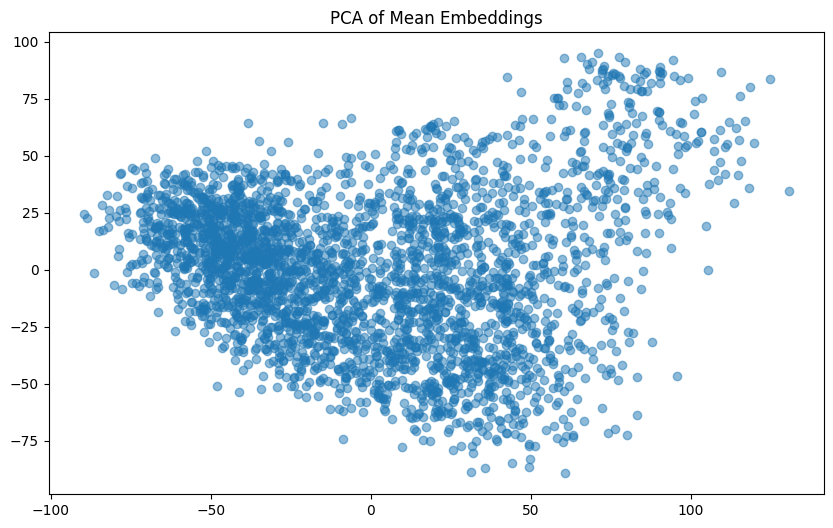

In [7]:
# Stack all mean embeddings to create a dataset for PCA
mean_embeddings_array = np.hstack(all_embeddings)
print(mean_embeddings_array.shape)

import matplotlib.pyplot as plt
from sklearn.decomposition import PCA

# Plot the PCA result

# Perform PCA
pca = PCA(n_components=1024)
pca_result = pca.fit_transform(mean_embeddings_array)

# Plot the PCA result
plt.figure(figsize=(10, 6))
plt.scatter(pca_result[:, 0], pca_result[:, 1], alpha=0.5)
plt.title("PCA of Mean Embeddings")
plt.show()

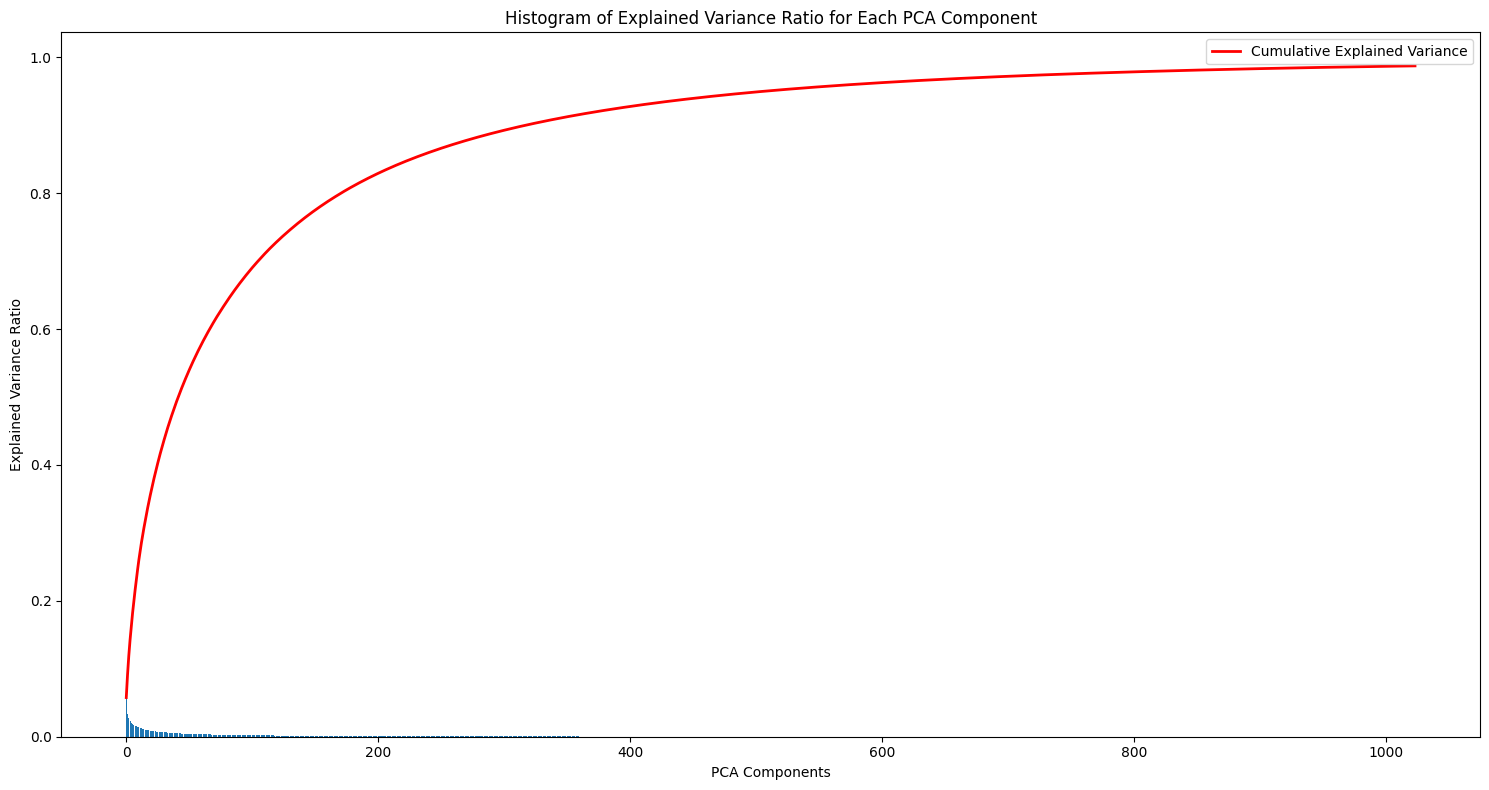

Number of components needed to explain 95% of the variance: 507
Total number of components: 1024


In [13]:
# Calculate the explained variance ratio for each component
explained_variance_ratio = pca.explained_variance_ratio_

# Create a histogram of the explained variance ratio
plt.figure(figsize=(15, 8))
plt.bar(range(len(explained_variance_ratio)), explained_variance_ratio)
plt.xlabel("PCA Components")
plt.ylabel("Explained Variance Ratio")
plt.title("Histogram of Explained Variance Ratio for Each PCA Component")

# Add a cumulative sum line
cumulative_variance_ratio = np.cumsum(explained_variance_ratio)
plt.plot(
    range(len(cumulative_variance_ratio)),
    cumulative_variance_ratio,
    "r-",
    linewidth=2,
    label="Cumulative Explained Variance",
)

plt.legend()
plt.tight_layout()
plt.show()

# Print the number of components needed to explain 95% of the variance
components_95 = np.argmax(cumulative_variance_ratio >= 0.95) + 1
print(f"Number of components needed to explain 95% of the variance: {components_95}")

# Print the total number of components
print(f"Total number of components: {len(explained_variance_ratio)}")

/data/home/antoni/miniconda3/envs/svd/lib/python3.10/site-packages/numpy/core/fromnumeric.py:3504: RuntimeWarning: Mean of empty slice.
  return _methods._mean(a, axis=axis, dtype=dtype,
/data/home/antoni/miniconda3/envs/svd/lib/python3.10/site-packages/numpy/core/_methods.py:129: RuntimeWarning: invalid value encountered in divide
  ret = ret.dtype.type(ret / rcount)


Embedding importance (sorted):
emb_7: 10.6454
emb_6: 7.7580
emb_5: 5.8389
emb_4: 4.4985
emb_3: 3.5210
emb_2: 2.8229
emb_1: 2.3818
emb_0: 2.0713
base: 1.3609
emb_8: nan
emb_9: nan
emb_10: nan
emb_11: nan
emb_12: nan
emb_13: nan
emb_14: nan
emb_15: nan
emb_16: nan
emb_17: nan
emb_18: nan
emb_19: nan
emb_20: nan
emb_21: nan
emb_22: nan
emb_23: nan


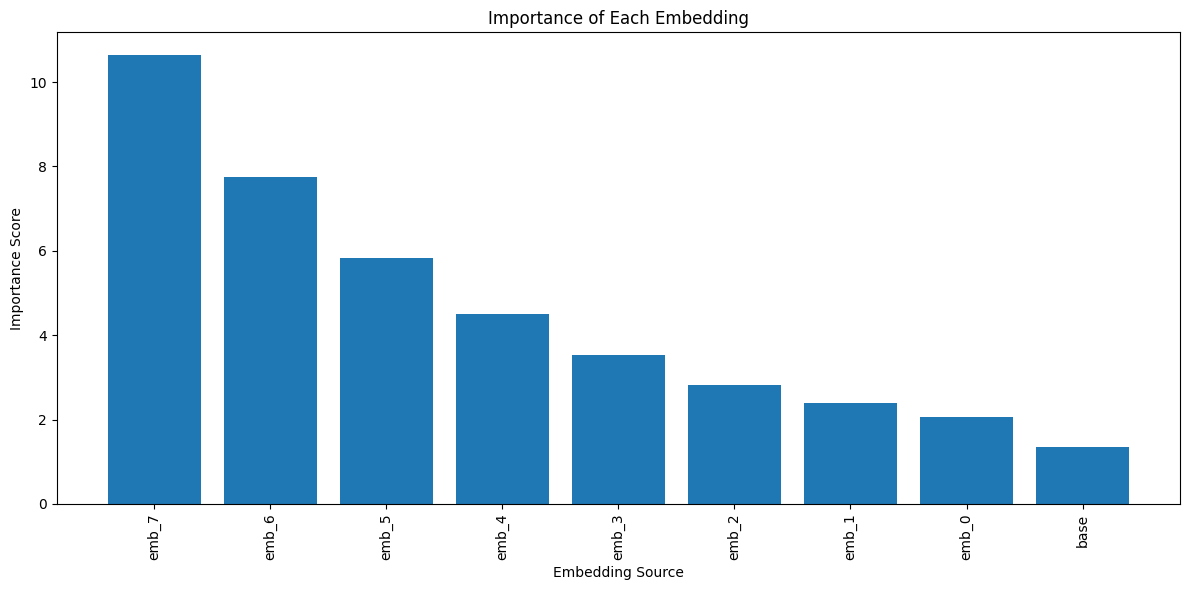

In [17]:
# Analyze PCA loadings
loadings = pca.components_.T
importance_scores = np.sum(np.abs(loadings), axis=1)

# Calculate importance for each embedding
embedding_importance = {}
start_idx = 0
for source, embedding in zip(embedding_sources, all_embeddings):
    end_idx = start_idx + embedding.shape[0]
    embedding_importance[source] = np.mean(importance_scores[start_idx:end_idx])
    start_idx = end_idx

# Sort embeddings by importance
sorted_importance = sorted(embedding_importance.items(), key=lambda x: x[1], reverse=True)

# Print the importance of each embedding
print("Embedding importance (sorted):")
for source, importance in sorted_importance:
    print(f"{source}: {importance:.4f}")

# Plot the importance of each embedding
plt.figure(figsize=(12, 6))
sources, importances = zip(*sorted_importance)
plt.bar(sources, importances)
plt.xticks(rotation=90)
plt.xlabel("Embedding Source")
plt.ylabel("Importance Score")
plt.title("Importance of Each Embedding")
plt.tight_layout()
plt.show()